## Imports

In [1]:
%env CUDA_VISIBLE_DEVICES=1
%env TF_CPP_MIN_LOG_LEVEL=1
%env TF_CPP_MIN_VLOG_LEVEL=1
%matplotlib inline

env: CUDA_VISIBLE_DEVICES=1
env: TF_CPP_MIN_LOG_LEVEL=1
env: TF_CPP_MIN_VLOG_LEVEL=1


In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
os.environ['TF_CPP_MIN_VLOG_LEVEL'] = '1'
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
import data.data_selector as ds
import utils.data_processing as dp
import utils.plot_functions as pf
import analysis.analysis_picker as ap

In [3]:
analysis_params = {
  "model_type": "lca",
  "model_name": "lca_256_l0_0.5",
  "data_type": "vanHateren",
  "num_patches": 1e4,
  "device": "/gpu:0",
  "version": "2.0",
  "num_inference_images": 5, #How many random images to average over for inference statistics
  "ft_padding": 32, #Fourier analysis padding for weight fitting
  "clobber": False}

# Computed params
analysis_params["model_dir"] = (os.path.expanduser("~")+"/Work/Projects/nowht_v3/"
  +analysis_params["model_name"]+"_v"+analysis_params["version"])

In [4]:
analyzer = ap.get_analyzer(analysis_params)

In [5]:
analyzer.model_params["data_type"] = analysis_params["data_type"]
analyzer.model_params["num_patches"] = analysis_params["num_patches"]
data = ds.get_data(analyzer.model_params)
data = analyzer.model.preprocess_dataset(data, analyzer.model_params)
data = analyzer.model.reshape_dataset(data, analyzer.model_params)
analyzer.model_params["data_shape"] = list(data["train"].shape[1:])
analyzer.model.setup(analyzer.model_params, analyzer.model_schedule)
analyzer.model_params["input_shape"] = [
  data["train"].num_rows*data["train"].num_cols*data["train"].num_channels]

In [6]:
if analysis_params["clobber"]:
  analyzer.run_analysis(data["train"].images, save_info="full_imgs")
else:
  analyzer.load_analysis(save_info="full_imgs")

In [7]:
#stats_fig = pf.plot_stats(analyzer.run_stats,
#  keys=["a_fraction_active", "recon_loss", "sparse_loss", "total_loss"],
#  labels=["activity", "recon loss", "sparse loss", "total loss"])

In [8]:
#atas_fig = pf.plot_data_tiled(analyzer.atas.T, normalize=False, title="Activity triggered averages on image data")

In [9]:
#noise_images = np.random.standard_normal(data["train"].images.shape) 
#noise_evals = analyzer.evaluate_model(noise_images, analyzer.var_names)
#noise_atas = analyzer.compute_atas(noise_evals["inference/activity:0"], noise_images)
#noise_atas_fig = pf.plot_data_tiled(noise_atas.T, normalize=False, title="Activity triggered averages on standard normal noise data")

In [10]:
#fig = pf.plot_data_tiled(analyzer.evals["weights/phi:0"].T)

In [11]:
#dict_fig = pf.plot_data_tiled(analyzer.evals["weights/phi:0"].T, normalize=False, title="Weights")

In [12]:
#inf_trace_fig = pf.plot_inference_traces(analyzer.inference_stats, analyzer.model_schedule[0]["sparse_mult"])

In [13]:
#inf_stats_fig = pf.plot_inference_stats(analyzer.inference_stats, title="Loss During Inference")

In [14]:
#rf_edge=10
#y_loc, x_loc = (4,4)
#Y,X = np.ogrid[-y_loc:rf_edge-y_loc, -x_loc:rf_edge-x_loc]
#print(X)
#print(Y)
#print(X+Y)
#print(X*X)
#print(Y*Y)
#print(X*X+Y*Y)

In [15]:
#grating = dp.generate_grating(rf_edge=16, location=(8,8), diameter=11,
#  orientation=np.pi/4, cycles=3, phase=4*np.pi/6, contrast=0.7)
#fig, ax = plt.subplots(1, figsize=(3, 3))
#ax = pf.clear_axis(ax, spines="k")
#ax.imshow(grating, cmap="Greys_r", vmin=0, vmax=1)
#plt.show()

In [16]:
#constructed_bfs = np.zeros_like(analyzer.evals["weights/phi:0"].T)
#for bf_idx in range(constructed_bfs.shape[0]):
#  params = dp.get_grating_params(analyzer.bf_stats, bf_idx)
#  grating = dp.generate_grating(*params)
#  constructed_bfs[bf_idx,...] = grating.reshape(256)
#fig = pf.plot_data_tiled(constructed_bfs)

In [17]:
#tmp_bf_idx = 3
#fit_bf_stats = dp.get_dictionary_stats(constructed_bfs, padding=32)
#fit_spatial_frequency = fit_bf_stats["spatial_frequencies"][tmp_bf_idx]
#bf_spatial_frequency = dp.get_grating_params(analyzer.bf_stats, tmp_bf_idx)[4]
#print(fit_spatial_frequency/bf_spatial_frequency)
#print(np.pi/2)

In [18]:
#fig = pf.plot_data_tiled(constructed_bfs)

In [19]:
#from scipy.optimize import curve_fit
#
#num_phases = 12
#num_orientations = 64
#num_contrasts = 7
#num_pixels = analyzer.bf_stats["patch_edge_size"]**2
#num_bfs = 49#analyzer.bf_stats["num_outputs"]
#
#def gauss(x, *p):
#  A, mu, sigma = p
#  return A*np.exp(-(x-mu)**2/(2*sigma**2))
#
#grating = lambda orientation,phase,contrast:dp.generate_grating(*dp.get_grating_params(analyzer.bf_stats,
#  bf_idx, orientation=orientation, phase=phase, contrast=contrast, diameter=-1))
#
#phases = np.linspace(-np.pi, np.pi, num_phases)
#orientations = np.linspace(-np.pi, np.pi, num_orientations)
#contrasts = np.linspace(0.4, 1.0, num_contrasts)
#contrast_activations = np.zeros((num_bfs, num_contrasts, num_orientations))
#half_widths = np.zeros((num_bfs, num_contrasts))
#phase_activations = np.zeros((num_bfs, num_contrasts, num_orientations, num_phases))
#best_phases = np.zeros((num_bfs, num_contrasts, num_orientations))
#for bf_idx in range(num_bfs):
#  for co_idx, contrast in enumerate(contrasts):
#    orientation_activations = np.zeros(num_orientations)
#    for or_idx, orientation in enumerate(orientations):
#      phase_stims = np.array([grating(orientation, phase, contrast).reshape(num_pixels) for phase in phases])
#      activity = analyzer.compute_activations(phase_stims)[:, bf_idx];
#      phase_activations[bf_idx, co_idx, or_idx, :] = activity
#      best_phases[bf_idx, co_idx, or_idx] = phases[np.argmax(activity)]
#      orientation_activations[or_idx] = np.max(activity) - np.min(activity) # peak-to-peak amplitude
#    norm_activity = orientation_activations / np.max(orientation_activations)
#    #max_idx = np.argmax(norm_activity)
#    #min_idx = np.argmin(norm_activity[:max_idx])
#    #min_idx2 = np.argmin(norm_activity[max_idx:])
#    #masked_act = norm_activity[min_idx:min_idx2]
#    #masked_ori = orientations[min_idx:min_idx2]
#    #p0 = [np.max(masked_act), np.mean(masked_act), np.std(masked_act)] # initial guess (A, mu, sigma)
#    #try:
#    #  coeff, var_matrix = curve_fit(gauss, masked_ori, masked_act, p0=p0)
#    #  half_widths[bf_idx, co_idx] = 2*np.sqrt(2*np.log(2))*coeff[2]
#    #except RuntimeError:
#    #  half_widths[bf_idx, co_idx] = None
#    contrast_activations[bf_idx, co_idx, :] = orientation_activations

#if np.max(orientation_activations) > 0: # It's possible that the neuron didn't respond
#  try:
#    norm_activity = orientation_activations / np.max(orientation_activations)
#    max_idx = np.argmax(norm_activity[1:])-1
#    if max_idx > 0:
#      min_idx = np.argmin(norm_activity[:max_idx])
#    else:
#      min_idx  = 0
#    min_idx2 = np.argmin(norm_activity[max_idx:])
#    if min_idx2<=1:
#       min_idx2 = num_orientations
#    masked_act = norm_activity[min_idx:min_idx2]
#    masked_ori = orientations[min_idx:min_idx2]
#    p0 = [np.max(masked_act), np.mean(masked_act), np.std(masked_act)] # init (A, mu, sigma)
#    coeff, var_matrix = curve_fit(gauss, masked_ori, masked_act, p0=p0)
#    half_widths[bf_idx, co_idx] = 2*np.sqrt(2*np.log(2))*coeff[2]
#  except:
#    half_widths[bf_idx, co_idx] = None
#else:
#  half_widths[bf_idx, co_idx] = None

#data = np.load(analyzer.analysis_out_dir+"/tuning_exp.npz")["data"].item()
#phases = data["phases"]
#orientations = data["orientations"]
#contrasts = data["contrasts"]
#contrast_activations = data["contrast_activations"]
#half_widths = data["half_widths"]
#phase_activations = data["phase_activations"]
#best_phases = data["best_phases"]

In [10]:
ot_contrasts = np.linspace(0.4, 1.0, 4)
ot_phases = np.linspace(-np.pi, np.pi, 12)
ot_orientations = np.linspace(-np.pi, np.pi, 64)

ot_grating_responses = analyzer.orientation_tuning(ot_contrasts, ot_orientations, ot_phases)
ot_best_phases = ot_grating_responses["best_phases"]
ot_activations = ot_grating_responses["activations"]
ot_contrast_activations = ot_grating_responses["contrast_activations"]
ot_phase_activations = ot_grating_responses["phase_activations"]
ot_phase_stims = ot_grating_responses["phase_stims"]

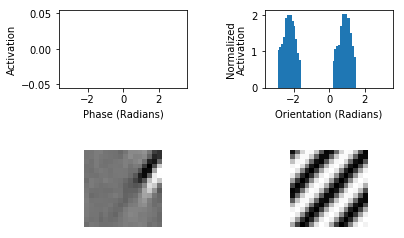

In [11]:
import matplotlib.gridspec as gridspec
grating = lambda orientation,phase,contrast:dp.generate_grating(*dp.get_grating_params(analyzer.bf_stats, bf_idx,
  orientation=orientation, phase=phase, contrast=contrast, diameter=-1))
#def plot_phase_orientation_responses(bf_idx, contrast_idx, analyzer):
bf_idx = 2
contrast_idx = -1
peak_orientation_idx = np.argmax(ot_contrast_activations[bf_idx, contrast_idx])
fig = plt.figure()
gs_widths = [1, 1]
gs_heights = [1, 1]
gs = gridspec.GridSpec(2, 2, wspace=0.6, hspace=0.8, width_ratios=gs_widths, height_ratios=gs_heights)

ax = plt.subplot(gs[0,0])
ax.bar(ot_phases, ot_phase_activations[bf_idx, contrast_idx, peak_orientation_idx, :], width=0.3)
ax.set_xlabel("Phase (Radians)")
ax.set_ylabel("Activation")

ax = plt.subplot(gs[0,1])
ax.bar(ot_orientations, ot_contrast_activations[bf_idx, contrast_idx], width=0.3)
ax.set_xlabel("Orientation (Radians)")
ax.set_ylabel("Normalized\nActivation")

ax = pf.clear_axis(plt.subplot(gs[1,0]))
ax.imshow(analyzer.bf_stats["basis_functions"][bf_idx], cmap="Greys_r")

best_phase = ot_best_phases[bf_idx, contrast_idx, peak_orientation_idx]
stim = grating(ot_orientations[peak_orientation_idx], best_phase, contrast=1.0)
ax = pf.clear_axis(plt.subplot(gs[1,1]))
ax.imshow(stim, cmap="Greys_r")
plt.show()

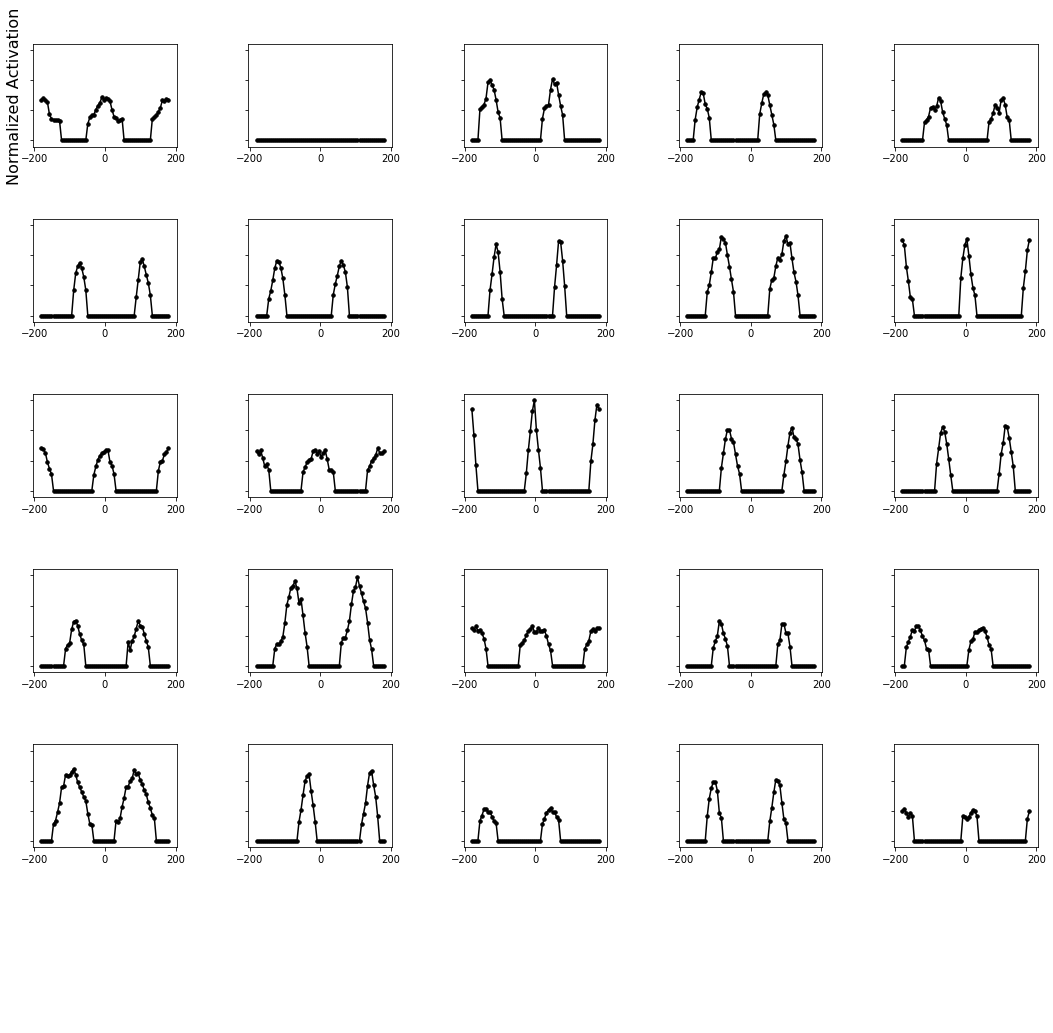

In [12]:
num_bfs = 25
cmap = plt.get_cmap('Greys')
cNorm = matplotlib.colors.Normalize(vmin=0.0, vmax=1.0)
scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap=cmap)

fig = plt.figure(figsize=(18,18))
num_plots_y = np.int32(np.ceil(np.sqrt(num_bfs)))+1
num_plots_x = np.int32(np.ceil(np.sqrt(num_bfs)))
gs_widths = [1.0,]*num_plots_x
gs_heights = [1.0,]*num_plots_y
gs = gridspec.GridSpec(num_plots_y, num_plots_x, wspace=0.5, hspace=0.7, width_ratios=gs_widths, height_ratios=gs_heights)
bf_idx = 0
for plot_id in np.ndindex((num_plots_y, num_plots_x)):
  (y_id, x_id) = plot_id
  if y_id == 0 and x_id == 0:
    ax = fig.add_subplot(gs[plot_id])
    ax.set_ylabel("Normalized Activation", fontsize=16)
    ax00 = ax
  else:
    ax = fig.add_subplot(gs[plot_id], sharey=ax00)
  if bf_idx < num_bfs:
    #for co_idx, contrast in enumerate(ot_contrasts):
    co_idx = -1
    contrast = ot_contrasts[co_idx]
    activity = ot_contrast_activations[bf_idx,co_idx,:]
    color_val = scalarMap.to_rgba(contrast)
    ax.plot(ot_orientations*(180/np.pi), activity, color=color_val)
    ax.scatter(ot_orientations*(180/np.pi), activity, s=12, c=color_val)
    bf_idx += 1
  else:
    ax = pf.clear_axis(ax, spines="none")
plt.show()

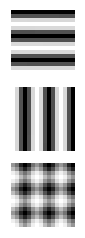

In [13]:
grating = lambda bf_idx,orientation,phase,contrast:dp.generate_grating(*dp.get_grating_params(analyzer.bf_stats,
  bf_idx, orientation=orientation, phase=phase, contrast=contrast, diameter=-1))

base_stimulus = grating(bf_idx=2, orientation=np.pi, phase=np.pi, contrast=1.0)
plaid_stimulus = grating(bf_idx=2, orientation=np.pi/2, phase=np.pi, contrast=1.0)
fig, ax = plt.subplots(3)
ax[0] = pf.clear_axis(ax[0])
ax[0].imshow(base_stimulus, cmap="Greys_r")
ax[1] = pf.clear_axis(ax[1])
ax[1].imshow(plaid_stimulus, cmap="Greys_r")
ax[2] = pf.clear_axis(ax[2])
ax[2].imshow((plaid_stimulus+base_stimulus)/2.0, cmap="Greys_r")
plt.show()

In [14]:
base_contrast = 0.5
base_phases = [ot_best_phases[bf_idx, -1, np.argmax(ot_contrast_activations[bf_idx,0,:])]
  for bf_idx in range(analyzer.bf_stats["num_outputs"])]
base_orientations = [ot_orientations[np.argmax(ot_contrast_activations[bf_idx,0,:])]
  for bf_idx in range(analyzer.bf_stats["num_outputs"])]
mask_contrasts = np.linspace(0.0, 0.5, 5)
mask_orientations = np.linspace(-np.pi, np.pi, 32)
mask_phases = np.linspace(-np.pi, np.pi, 12)

co_grating_responses = analyzer.cross_orientation_suppression(base_contrast, base_orientations, base_phases,
  mask_contrasts, mask_orientations, mask_phases)

co_test_stims = co_grating_responses["test_stims"]
co_base_stims = co_grating_responses["base_stims"]
co_best_phases = co_grating_responses["best_phases"]
co_contrast_activations = co_grating_responses["contrast_activations"]
co_base_activations = co_grating_responses["base_activations"]
co_test_activations = co_grating_responses["test_activations"]

In [30]:
print(co_test_stims.shape)
print(co_best_phases.shape)
print(mask_contrasts)
print(mask_orientations*(180/np.pi))
print(mask_phases)
print(mask_phases.shape)
print(np.where(mask_phases==co_best_phases[9, -1, 7]))
print(np.argmax(co_contrast_activations[bf_idx, co_idx]))

(256, 5, 32, 12, 256)
(256, 5, 32)
[0.    0.125 0.25  0.375 0.5  ]
[-180.         -168.38709677 -156.77419355 -145.16129032 -133.5483871
 -121.93548387 -110.32258065  -98.70967742  -87.09677419  -75.48387097
  -63.87096774  -52.25806452  -40.64516129  -29.03225806  -17.41935484
   -5.80645161    5.80645161   17.41935484   29.03225806   40.64516129
   52.25806452   63.87096774   75.48387097   87.09677419   98.70967742
  110.32258065  121.93548387  133.5483871   145.16129032  156.77419355
  168.38709677  180.        ]
[-3.14159265 -2.57039399 -1.99919533 -1.42799666 -0.856798   -0.28559933
  0.28559933  0.856798    1.42799666  1.99919533  2.57039399  3.14159265]
(12,)
(array([2]),)
23


0.5025451803611007
1.460472407413489
0.25000054083133394
0.7499936259414399


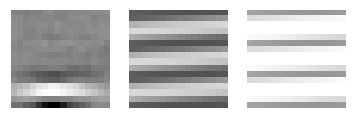

In [44]:
bf_idx = 9
co_idx = -1
or_idx = np.argmax(co_contrast_activations[bf_idx, co_idx])
best_phase = co_best_phases[bf_idx, co_idx, or_idx]
ph_idx = np.argwhere(mask_phases==best_phase)

test_stim = co_test_stims[bf_idx, co_idx, or_idx, ph_idx].reshape(16,16)
base_stim = co_base_stims[bf_idx].reshape((16,16))

print(np.min(test_stim))
print(np.max(test_stim))
print(np.min(base_stim))
print(np.max(base_stim))

fig, ax = plt.subplots(1,3)
ax[0] = pf.clear_axis(ax[0])
ax[0].imshow(analyzer.bf_stats["basis_functions"][bf_idx], cmap="Greys_r")
ax[1] = pf.clear_axis(ax[1])
ax[1].imshow(base_stim, cmap="Greys_r", vmin=0, vmax=1)
ax[2] = pf.clear_axis(ax[2])
ax[2].imshow(test_stim, cmap="Greys_r", vmin=0, vmax=1)
plt.show()

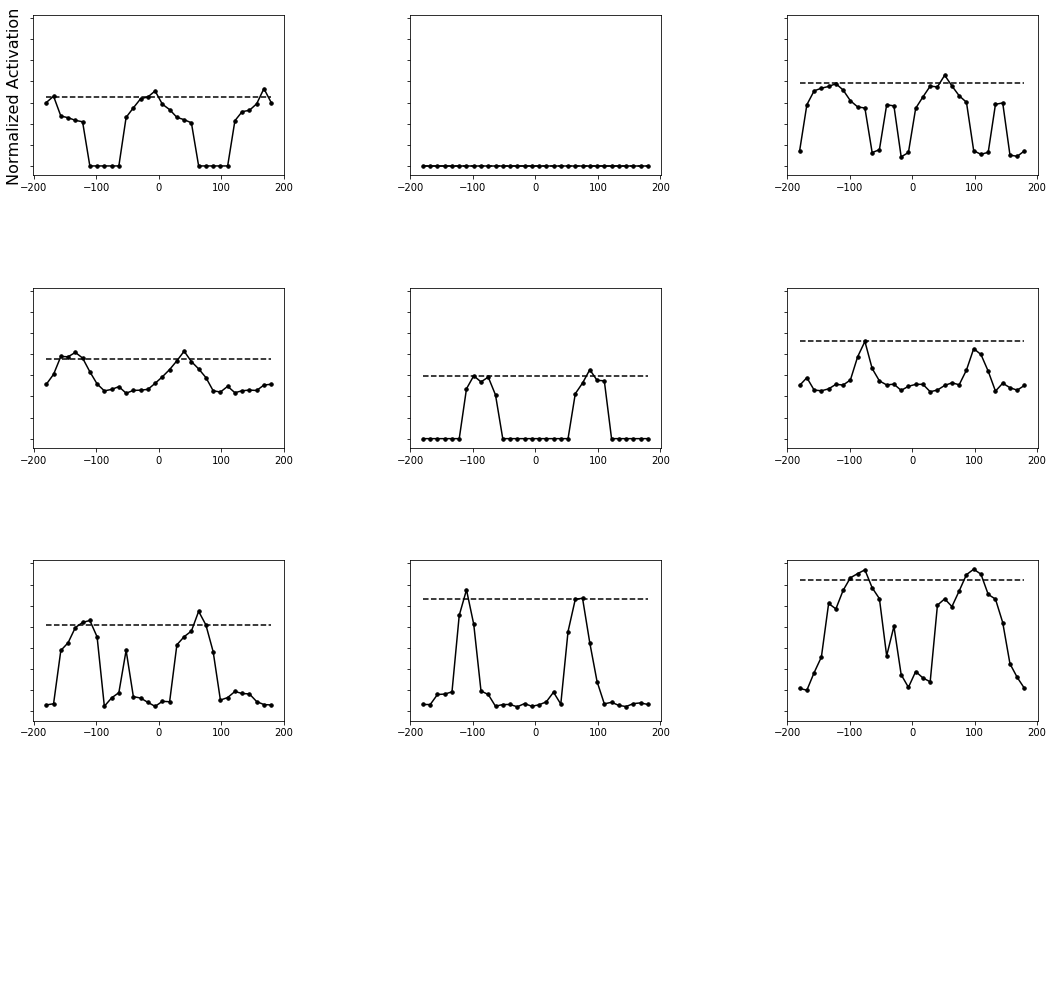

In [31]:
num_bfs = 9
num_orientations = np.asarray(mask_orientations).size
cmap = plt.get_cmap('Greys')
cNorm = matplotlib.colors.Normalize(vmin=0.0, vmax=1.0)
scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap=cmap)

fig = plt.figure(figsize=(18,18))
num_plots_y = np.int32(np.ceil(np.sqrt(num_bfs)))+1
num_plots_x = np.int32(np.ceil(np.sqrt(num_bfs)))
gs_widths = [1.0,]*num_plots_x
gs_heights = [1.0,]*num_plots_y
gs = gridspec.GridSpec(num_plots_y, num_plots_x, wspace=0.5, hspace=0.7, width_ratios=gs_widths, height_ratios=gs_heights)
bf_idx = 0
for plot_id in np.ndindex((num_plots_y, num_plots_x)):
  (y_id, x_id) = plot_id
  if y_id == 0 and x_id == 0:
    ax = fig.add_subplot(gs[plot_id])
    ax.set_ylabel("Normalized Activation", fontsize=16)
    ax.set_ylim([0.0, np.max(co_contrast_activations)])
    ax00 = ax
  else:
    ax = fig.add_subplot(gs[plot_id], sharey=ax00)
  if bf_idx < num_bfs:
    co_idx = -1
    contrast = base_contrast
    base_activity = co_base_activations[bf_idx, bf_idx]
    masked_activity  = co_contrast_activations[bf_idx, co_idx, :]
    color_val = scalarMap.to_rgba(1.0)#contrast)
    ax.plot(mask_orientations*(180/np.pi), [base_activity,]*num_orientations, linestyle="--", color=color_val)
    ax.plot(mask_orientations*(180/np.pi), masked_activity, linestyle="-", color=color_val)
    ax.scatter(mask_orientations*(180/np.pi), masked_activity, s=12, c=color_val)
    bf_idx += 1
  else:
    ax = pf.clear_axis(ax, spines="none")
plt.show()

In [37]:
co_base_stims.shape

(491520, 256)

In [ ]:
fig, ax = plt.subplots(3)
ax[0] = pf.clear_axis(ax[0])
ax[0].imshow(base_stimulus, cmap="Greys_r")
ax[1] = pf.clear_axis(ax[1])
ax[1].imshow(plaid_stimulus, cmap="Greys_r")
ax[2] = pf.clear_axis(ax[2])
ax[2].imshow((plaid_stimulus+base_stimulus)/2.0, cmap="Greys_r")
plt.show()